# Análisis Resultados
## EquiBind- Astex diverse set

In [1]:
# cargar fichero resultados
import pandas as pd
import numpy as np

def load_result(path_file:str):
    df= pd.read_csv(path_file, header=None, usecols=[0] + list(np.arange(3, 29)),  index_col=0)
    df.columns=[
    #"mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "inchi_convertible",
    "all_atoms_connected",
    "molecular_formula",
    "molecular_bonds",
    "double_bond_stereochemistry",
    "tetrahedral_chirality",
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "non_aromatic_ring_non_flatness",
    "double_bond_flatness",
    "internal_energy",
    "protein_ligand_maximum_distance",
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "minimum_distance_to_waters",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
    "volume_overlap_with_waters",
    "rmsd_leq_2A"
]
    return df


## Resultados EquiBind

In [9]:
equibind_results = load_result("EquiBind/results_astex/resultsBust.csv")
equibind_results

,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
1G9V_RQ3,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GKC_NFH,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,False,True,True,True,False
1GM8_SOX,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GPK_HUP,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1HNN_SKF,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1YWR_LI9,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1Z95_198,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
2BM2_PM2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [10]:
# número de test que pasa cada complejo proteina-ligando
x=equibind_results.sum(axis=1)
x

0
1G9V_RQ3    23
1GKC_NFH    22
1GM8_SOX    23
1GPK_HUP    23
1HNN_SKF    23
            ..
1YWR_LI9    23
1Z95_198    21
2BM2_PM2    25
2BR1_PFP    24
2BSM_BSM    23
Length: 85, dtype: int64

In [11]:
equibind_results.all(axis=1)

0
1G9V_RQ3    False
1GKC_NFH    False
1GM8_SOX    False
1GPK_HUP    False
1HNN_SKF    False
            ...  
1YWR_LI9    False
1Z95_198    False
2BM2_PM2    False
2BR1_PFP    False
2BSM_BSM    False
Length: 85, dtype: bool

In [12]:
np.mean((x/26)*100) #score medio de posebuster para el dataset

np.float64(86.83257918552033)

In [13]:
# número de complejo proteina-ligando que cumple cada test
y=equibind_results.sum(axis=0)
y

mol_true_loaded                            85
mol_cond_loaded                            85
sanitization                               85
inchi_convertible                          85
all_atoms_connected                        85
molecular_formula                          85
molecular_bonds                            85
double_bond_stereochemistry                85
tetrahedral_chirality                      85
bond_lengths                               85
bond_angles                                85
internal_steric_clash                      85
aromatic_ring_flatness                     77
non_aromatic_ring_non_flatness             85
double_bond_flatness                       85
internal_energy                            75
protein_ligand_maximum_distance            85
minimum_distance_to_protein                 2
minimum_distance_to_organic_cofactors      79
minimum_distance_to_inorganic_cofactors    80
minimum_distance_to_waters                 79
volume_overlap_with_protein       

### Gráficas


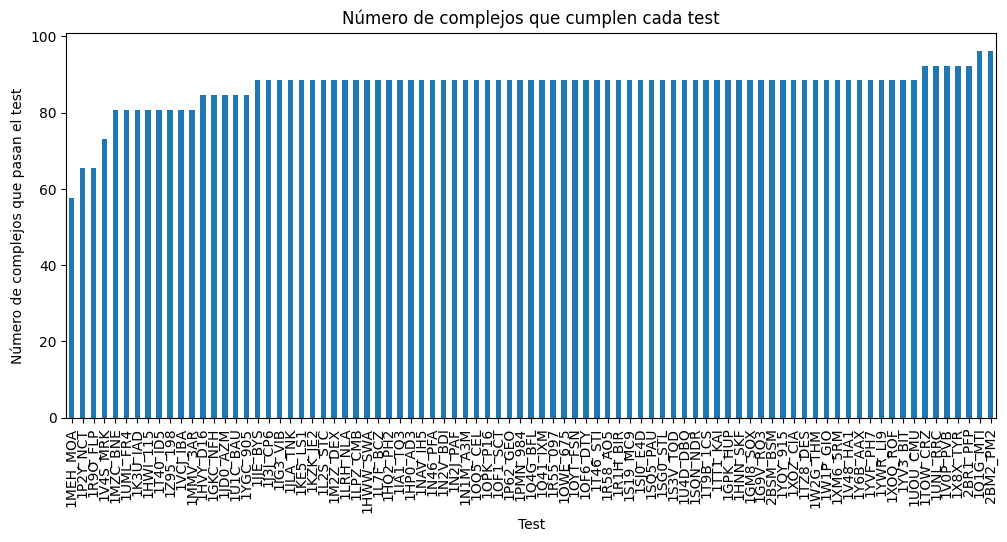

In [14]:
import matplotlib.pyplot as plt

(x.sort_values()/26*100).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Test")
plt.ylabel("Número de complejos que pasan el test")
plt.title("Número de complejos que cumplen cada test")
plt.show()

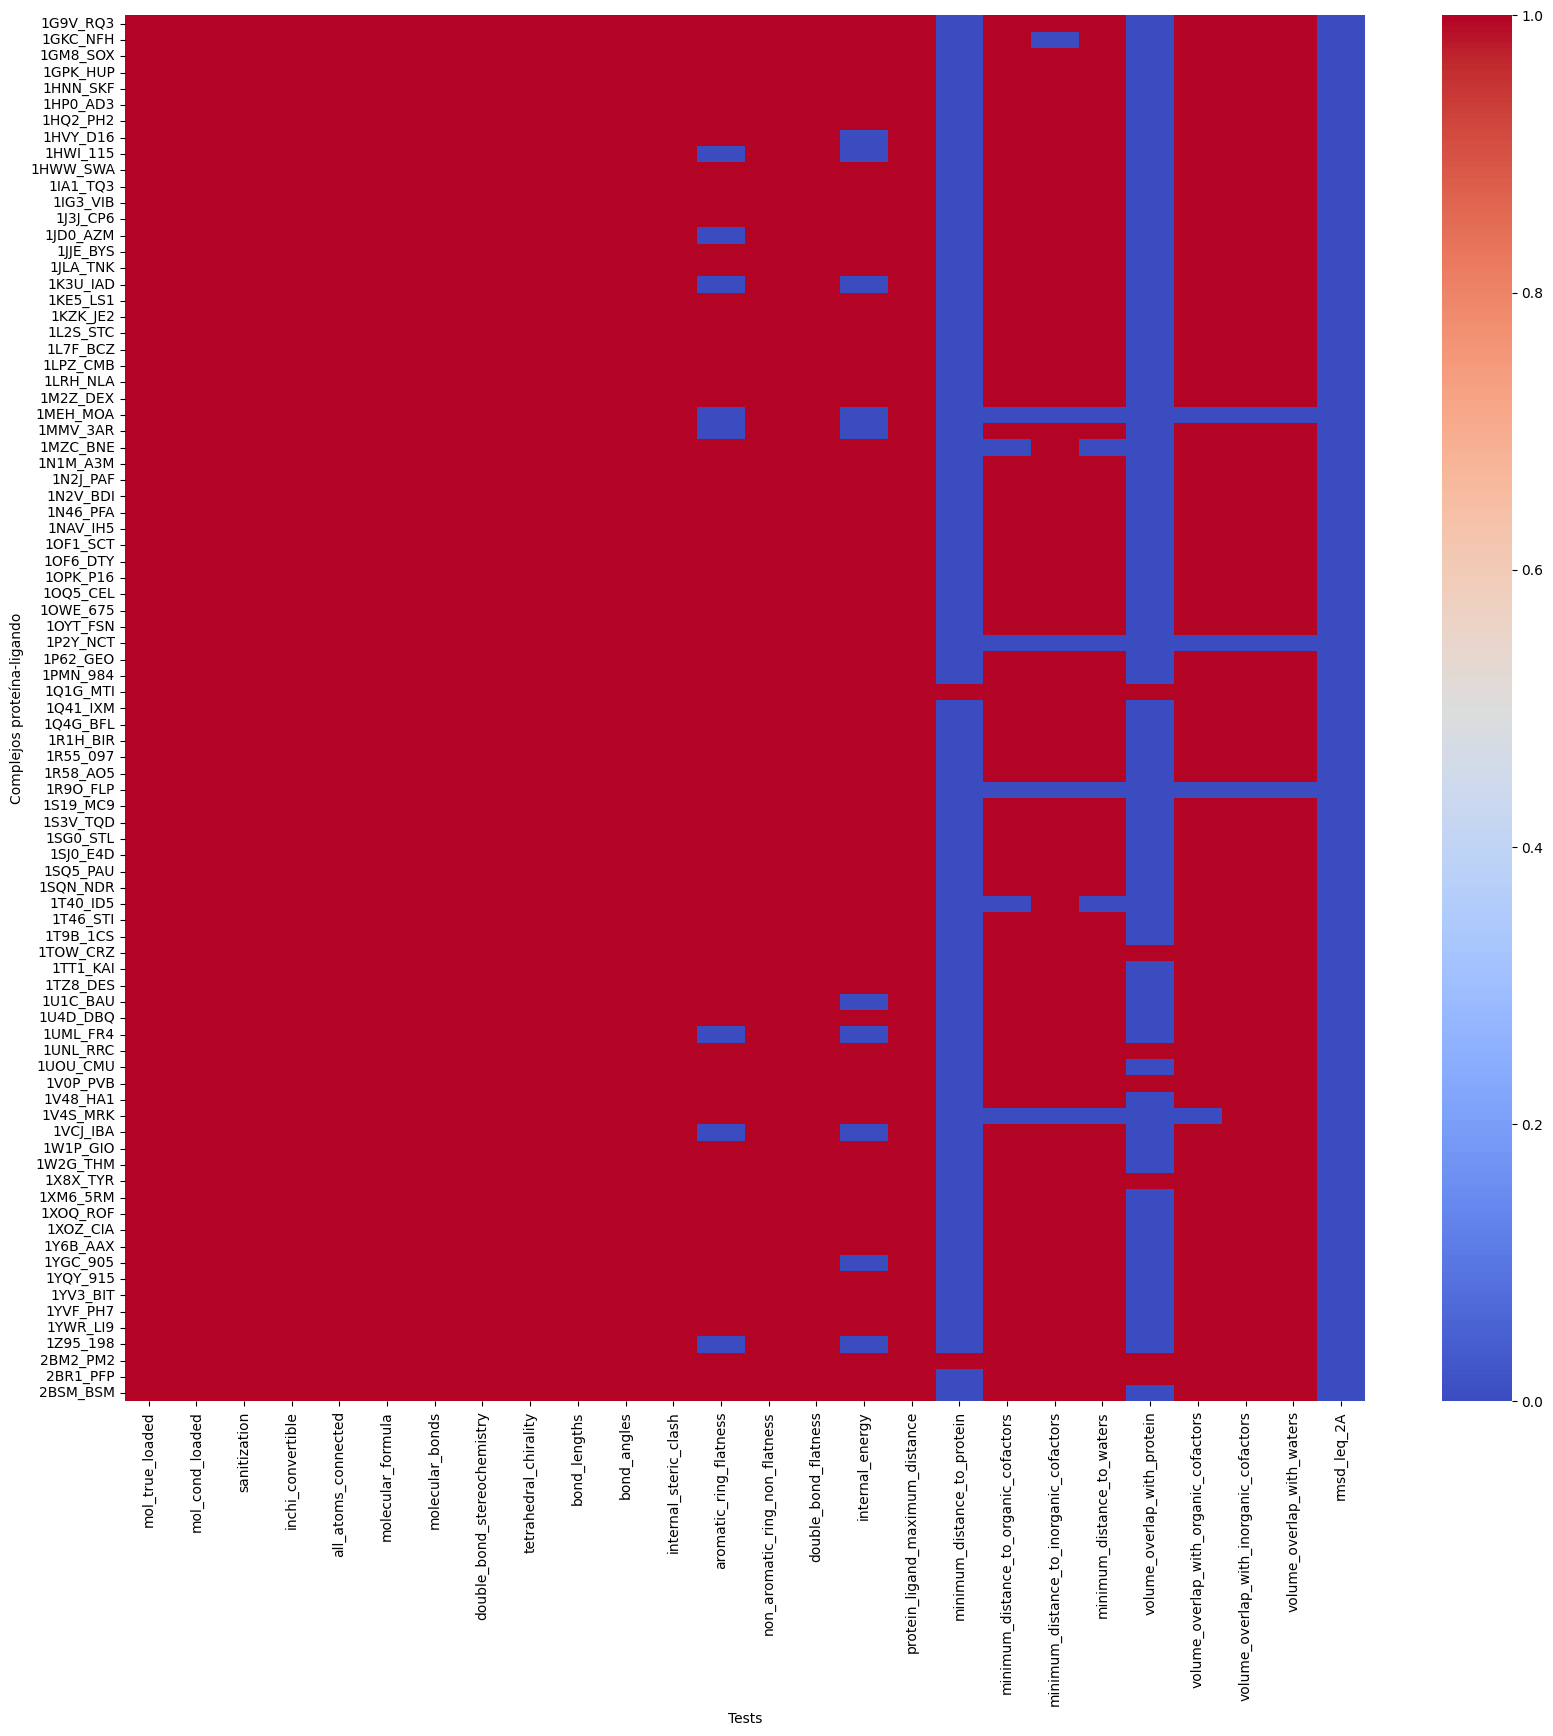

In [16]:
import seaborn as sns
plt.figure(figsize=(20, 18))
sns.heatmap(equibind_results.astype(int), cmap="coolwarm", cbar=True)
plt.xlabel("Tests")
plt.ylabel("Complejos proteína-ligando")
plt.show()

## Resultados DiffDock

In [34]:
diffdock_results = load_result("DiffDock/results_astex/evaluation.csv")
diffdock_results

,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
1G9V_RQ3,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
1GKC_NFH,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
1GM8_SOX,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
1GPK_HUP,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1HNN_SKF,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1YWR_LI9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1Z95_198,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2BM2_PM2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [39]:
x=diffdock_results.sum(axis=1)/27
print("Media:", x.mean())

Media: 0.9182475158084914


In [58]:
diffdock_results.all(axis=1)

0
1G9V_RQ3    False
1GKC_NFH    False
1GM8_SOX    False
1GPK_HUP     True
1HNN_SKF    False
            ...  
1YWR_LI9     True
1Z95_198     True
2BM2_PM2     True
2BR1_PFP     True
2BSM_BSM     True
Length: 82, dtype: bool

In [62]:
diffdock_results.all(axis=1).mean() # porcentaje que pasa todos los test

np.float64(0.43902439024390244)

In [63]:
diffdock_results['rmsd_leq_2A'].sum()/82

np.float64(0.9512195121951219)

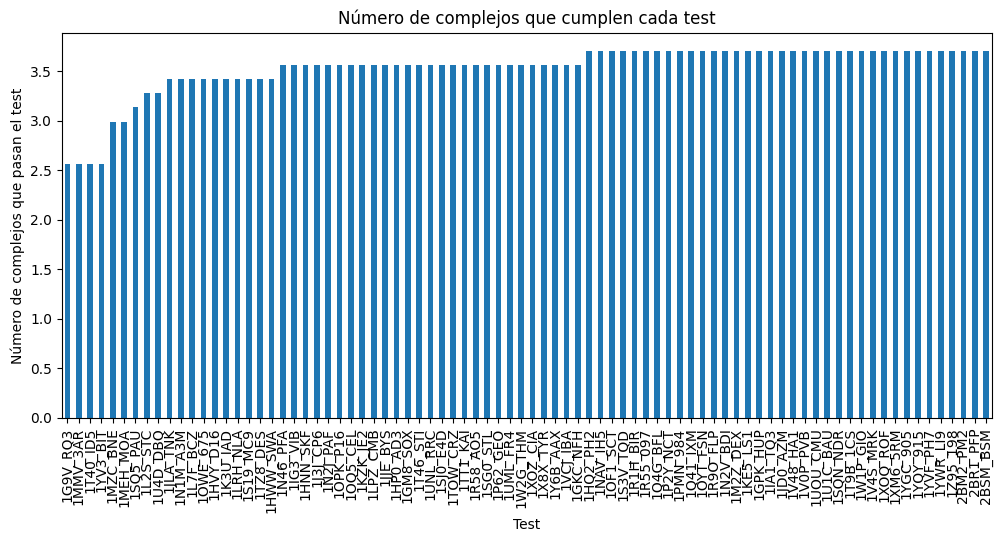

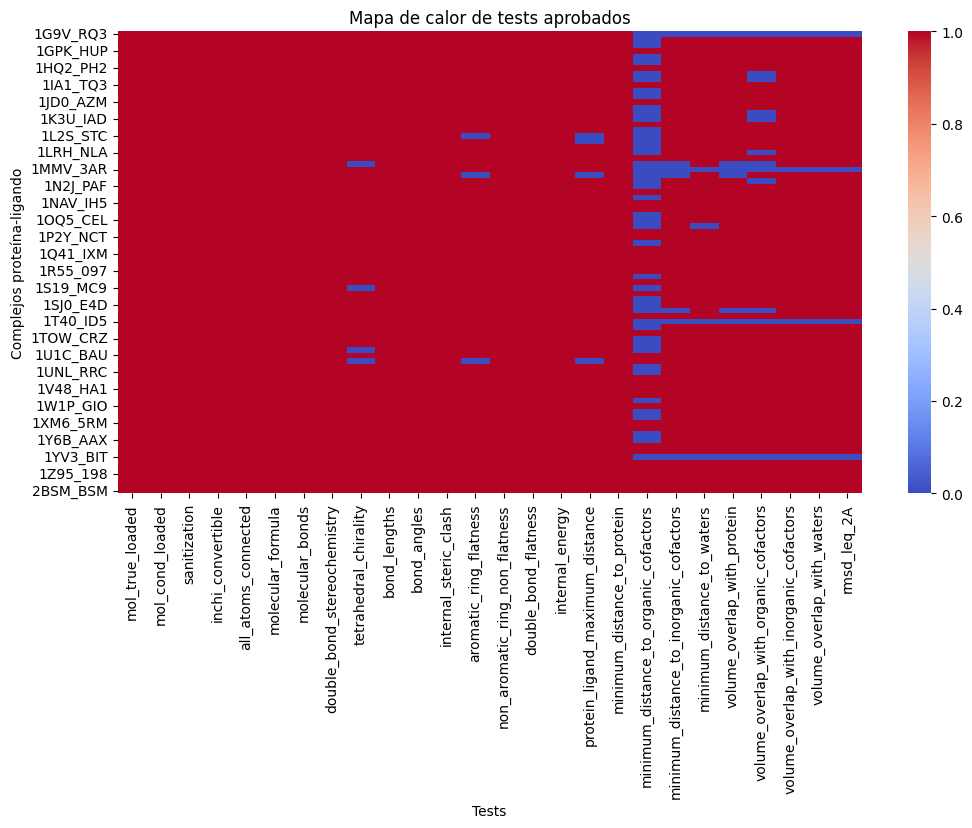

In [41]:
(x.sort_values()/26*100).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Test")
plt.ylabel("Número de complejos que pasan el test")
plt.title("Número de complejos que cumplen cada test")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(diffdock_results.astype(int), cmap="coolwarm", cbar=True)
plt.xlabel("Tests")
plt.ylabel("Complejos proteína-ligando")
plt.title("Mapa de calor de tests aprobados")
plt.show()

# Visualización

<b>Resultado para distintas herramientas (Equibind, DiffDock) para 1G9V_RQ3</b>

In [42]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

with open('astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb') as ifile:
    protein = ifile.read()

diffdock_mol = Chem.SDMolSupplier("astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand.sdf")[0]     
init_mol = Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank1.sdf")[0]
equibind_mol = Chem.SDMolSupplier("EquiBind/results_astex/1G9V_RQ3/lig_equibind_corrected.sdf")[0]  
deepdock_mol=  Chem.SDMolSupplier("astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf")[0]  


p = py3Dmol.view(width=500, height=500)


p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(init_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(deepdock_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 1}  
lig_init = {'model':2}  
lig_equibind = {'model':3}  
lig_deepdock = {'model':4}

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'gray'}})  
p.setStyle(lig_init, {'stick': {'color': 'blue'}}) 
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'green'}})
p.setStyle(lig_deepdock, {'stick': {'color': 'black'}})    


p.addLabel("Proteína", {'position': {'x': 30, 'y': 55, 'z': 0}, 'fontColor': 'gray', 'backgroundColor': 'white'})
p.addLabel("Ligando DiffDock", {'position': {'x': 28, 'y': 50, 'z': 0}, 'fontColor': 'red', 'backgroundColor': 'white'})
p.addLabel("Ligando Inicial", {'position': {'x': 28, 'y': 45, 'z': 0}, 'fontColor': 'blue', 'backgroundColor': 'white'})
p.addLabel("Ligando Equibind ", {'position': {'x': 28, 'y': 40, 'z': 0}, 'fontColor': 'green', 'backgroundColor': 'white'})
p.addLabel("Ligando DeepDock ", {'position': {'x': 28, 'y': 35, 'z': 0}, 'fontColor': 'black', 'backgroundColor': 'white'})


# Ajustar la vista
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [52]:
!bust astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf -l astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand.sdf -p astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb 

astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf 1G9V_RQ3_A_801  passes (24 / 27)


<b>Representación para los distintos resultados de DiffDock según el ranking de confidence score</b>

In [38]:
with open('/home/carmen/tfg/astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb') as ifile:
    protein = ifile.read()
p = py3Dmol.view(width=500, height=500)

rank10=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank10_confidence-4.19.sdf")[0]
rank5=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank5_confidence-2.07.sdf")[0]
rank2=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank2_confidence-1.11.sdf")[0]

p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(rank2), 'sdf')
p.addModel(Chem.MolToMolBlock(rank5), 'sdf')
p.addModel(Chem.MolToMolBlock(rank10), 'sdf')

p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 1}  
lig_rank2 = {'model':2}  
lig_rank5 = {'model':3}  
lig_rank10 = {'model':4} 
lig_equibind = {'model':5}  

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'gray'}})  
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_rank2, {'stick': {'color': 'green'}}) 
p.setStyle(lig_rank5, {'stick': {'color': 'orange'}})   
p.setStyle(lig_rank10, {'stick': {'color': 'blue'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'black'}}) 



# Ajustar la vista
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.